# Installing MNE and Importing the required Modules 

In [12]:
!pip install mne

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [13]:
# Required Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
from mne.time_frequency import psd_array_multitaper
import os

### Loading the EGG dataset to notebook 

In [14]:
# Directory path on local device
directory_path = r'/kaggle/input/eeg-dataset/eeg-during-mental-arithmetic-tasks-1.0.0' 

In [15]:
# Loading the suject info of the 36 subjects 
file_path = r"/kaggle/input/eeg-dataset/eeg-during-mental-arithmetic-tasks-1.0.0/subject-info.csv"

# Reading the CSV file into a DataFrame
subject_info_df = pd.read_csv(file_path)

In [16]:
subject_info_df

,Subject,Age,Gender,Recording year,Number of subtractions,Count quality
0,Subject00,21,F,2011,9.70,0
1,Subject01,18,F,2011,29.35,1
2,Subject02,19,F,2012,12.88,1
3,Subject03,17,F,2010,31.00,1
4,Subject04,17,F,2010,8.60,0
5,Subject05,16,F,2010,20.71,1
6,Subject06,18,M,2011,4.35,0
7,Subject07,18,F,2012,13.38,1
8,Subject08,26,M,2011,18.24,1
9,Subject09,16,F,2010,7.00,0


In [17]:
# Total number of edf (europiean data format ) files in the directory , 36 Rest and 36 Task
edf_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.edf')]
print(len(edf_files))

72


In [18]:
raw_data = []  # All thr data of 72 files is in this list
successful_count = 0
failure_count = 0
for file_path in edf_files:
    try:
        # Load each file
        data = mne.io.read_raw_edf(file_path, preload=True)
        raw_data.append(data)  
        successful_count = successful_count + 1
    except Exception as e:
        failure_count = failure_count + 1


Extracting EDF parameters from /kaggle/input/eeg-dataset/eeg-during-mental-arithmetic-tasks-1.0.0/Subject10_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from /kaggle/input/eeg-dataset/eeg-during-mental-arithmetic-tasks-1.0.0/Subject26_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /kaggle/input/eeg-dataset/eeg-during-mental-arithmetic-tasks-1.0.0/Subject07_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from /kaggle/input/eeg-dataset/eeg-during-mental-arithmetic-tasks-1.0.0/Subject27_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.00

In [19]:
print(successful_count)
print(failure_count) # All the edf files successfully loaded in the list named raw_data

72
0


In [20]:
data = [] # Organised data 
for i in range(0,len(raw_data),2):
    x = [raw_data[i],raw_data[i+1]]
    data.append(x)
    x = []

In [21]:
len(data) # data of 36 subjects

36

In [22]:
print(type(data[0])) # List containing [rest,task] of subject_00
print(type(data[0][0])) # Class 'mne.io.edf.edf.RawEDF' , 0 index is subjected to rest state and 1 index is subjected to task
print(data[0][0]) # Rest
print(data[0][1]) # Task

<class 'list'>
<class 'mne.io.edf.edf.RawEDF'>
<RawEDF | Subject10_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>
<RawEDF | Subject26_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>


In [23]:
data[0][0].info # info of a file which is in edf format , this is how edf file looks like

Measurement date,"January 01, 2010 00:00:00 GMT"
Experimenter,Unknown
Participant,2
Digitized points,Not available
Good channels,21 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.50 Hz
Lowpass,45.00 Hz


In [24]:
# Accessing the first loaded dataset
print(data[0][0].info)

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2010-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
 subject_info: 4 items (dict)
>


In [25]:
data[:5]

[[<RawEDF | Subject10_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>,
  <RawEDF | Subject26_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>],
 [<RawEDF | Subject07_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>,
  <RawEDF | Subject27_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>],
 [<RawEDF | Subject29_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>,
  <RawEDF | Subject13_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>],
 [<RawEDF | Subject35_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>,
  <RawEDF | Subject28_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>],
 [<RawEDF | Subject35_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>,
  <RawEDF | Subject33_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>]]

Using matplotlib as 2D backend.


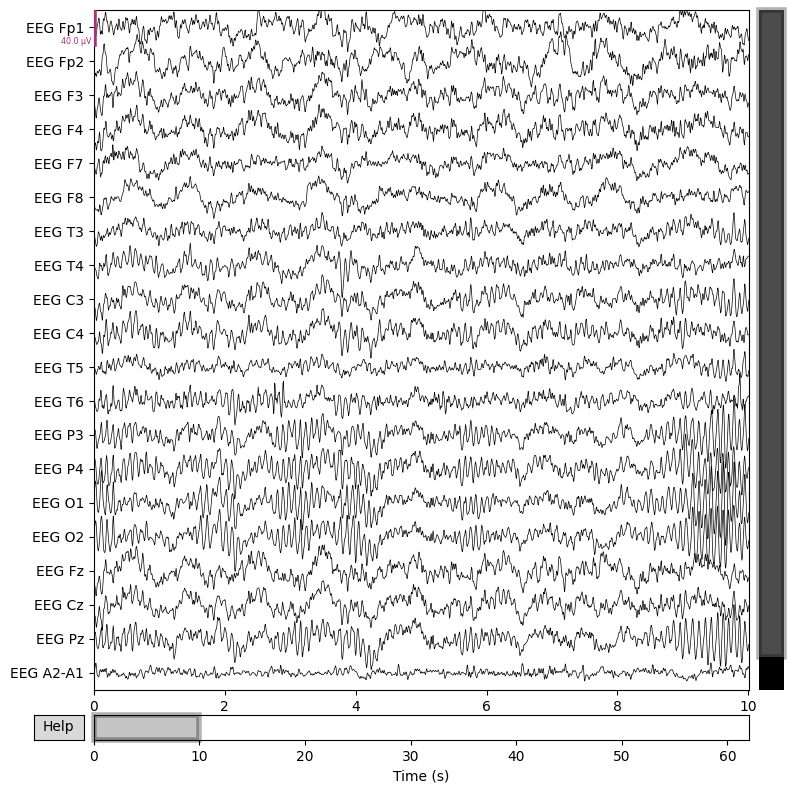

Figure(800x800)


In [26]:
# Plotting the data to visually inspect it
print(data[0][0].plot())

In [27]:
type(data[1][0]) # Knowing the datatype 

mne.io.edf.edf.RawEDF

In [28]:
# Focus on the following frequency bands: Delta (1-4
# Hz), Theta (4-8 Hz), Alpha (8-12 Hz), Beta (12-30 Hz), and Gamma (30-100
# Hz).

bands = {
    'Delta': (1, 4),
    'Theta': (4, 8),
    'Alpha': (8, 12),
    'Beta': (12, 30),
    'Gamma': (30, 100)
}

In [29]:
# Seeing the loop  in bands to use it further functions
for band, (fmin, fmax) in bands.items():
    print(band , (fmin , fmax))

Delta (1, 4)
Theta (4, 8)
Alpha (8, 12)
Beta (12, 30)
Gamma (30, 100)


In [30]:
def calculate_psd_pair(eeg_pair, fmin=1, fmax=100):
    """
    The function returns a dictionary containing the PSD data for both the rest and task states of the EEG recording, and an array of the corresponding frequencies
    Each band array holds PSD values corresponding to the average power density in that frequency band across the EEG channels:
    Each value in this array represents the mean power density (in units squared per Hz) for the Delta band, averaged across all EEG channels for one recording. The values are very small because power in these bands is distributed across a spectrum, and because of the square of the voltage measurement in power calculations.
    
    Parameters:
    eeg_pair is list - [Rest , Task] of any subject in edf form , one input of egg_pair is data[0] etc.
    
    """    
    
    bands = {
        'Delta': (1, 4),
        'Theta': (4, 8),
        'Alpha': (8, 12),
        'Beta': (12, 30),
        'Gamma': (30, 100)
    }

    psd_results = {}

    for label, eeg_data in zip(['Rest', 'Task'], eeg_pair):
        # Compute the spectral data using the compute_psd method
        spectrum = eeg_data.compute_psd(method='welch', fmin=fmin, fmax=fmax)
        
        # Extract data and frequencies from the spectrum object
        psd, freqs = spectrum.get_data(return_freqs=True)
        
        # Store PSD for each band
        psd_results[label] = {}
        for band, (fmin_band, fmax_band) in bands.items():
            idx_band = np.logical_and(freqs >= fmin_band, freqs <= fmax_band)
            psd_results[label][band] = psd[:, idx_band].mean(axis=1)
    
    return psd_results


In [31]:
def calculate_psd_pair_mean(eeg_pair, fmin=1, fmax=100):
    
    """
        Calculate the mean Power Spectral Density (PSD) for predefined frequency bands
        from EEG data during 'Rest' and 'Task' states.

        This function processes a pair of EEG recordings for a single subject, one recorded
        during a resting state and the other during a task. It computes the PSD for each state
        using Welch's method across specified frequency bands and returns the mean PSD values
        for each band and state.

        Parameters:
        eeg_pair is list - [Rest , Task] of any subject in edf form , one input of egg_pair is data[0] etc.
        """
    
    bands = {
        'Delta': (1, 4),
        'Theta': (4, 8),
        'Alpha': (8, 12),
        'Beta': (12, 30),
        'Gamma': (30, 100)
    }

    psd_results = {}

    for label, eeg_data in zip(['Rest', 'Task'], eeg_pair):
        # Compute the spectral data using the compute_psd method
        spectrum = eeg_data.compute_psd(method='welch', fmin=fmin, fmax=fmax)
        
        # Extract data and frequencies from the spectrum object
        psd, freqs = spectrum.get_data(return_freqs=True)
        
        # Store PSD for each band
        psd_results[label] = {}
        for band, (fmin_band, fmax_band) in bands.items():
            idx_band = np.logical_and(freqs >= fmin_band, freqs <= fmax_band)
            # Calculate the mean across all electrodes for each frequency band and then take the mean of these values
            psd_results[label][band] = np.mean(psd[:, idx_band], axis=1).mean()

    return psd_results

In [32]:
calculate_psd_pair(data[0]) # Testing the function on data[0]

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


{'Rest': {'Delta': array([8.53097781e-12, 1.78628495e-11, 7.15614084e-12, 7.01879087e-12,
         6.02426186e-12, 9.53593122e-12, 3.93264751e-12, 4.32637275e-12,
         7.15027016e-12, 6.77539726e-12, 2.45428585e-12, 2.98712989e-12,
         7.04672740e-12, 8.45570784e-12, 7.70624109e-12, 8.17471992e-12,
         8.33655971e-12, 8.77884578e-12, 8.12782609e-12, 9.01251241e-13,
         1.33130989e-09]),
  'Theta': array([2.49929411e-12, 3.94687909e-12, 4.27645992e-12, 4.06492996e-12,
         1.74370197e-12, 2.01842094e-12, 1.27176204e-12, 1.39275222e-12,
         2.77728682e-12, 2.57698162e-12, 9.20332412e-13, 1.43531658e-12,
         1.80826630e-12, 2.03582579e-12, 1.45993106e-12, 1.42474159e-12,
         5.94000474e-12, 3.27661713e-12, 1.82504282e-12, 5.02053156e-13,
         7.82073536e-10]),
  'Alpha': array([1.57038631e-12, 1.94340527e-12, 1.81552254e-12, 1.81171471e-12,
         9.55519252e-13, 1.01289391e-12, 1.56986550e-12, 1.22909392e-12,
         3.52122021e-12, 2.61583730

In [33]:
calculate_psd_pair_mean(data[0]) # Testing the function on data[0]

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


{'Rest': {'Delta': 7.012346763495749e-11,
  'Theta': 3.948905410712535e-11,
  'Alpha': 2.562094640299405e-11,
  'Beta': 1.2367124807965464e-11,
  'Gamma': 5.713055172792742e-14},
 'Task': {'Delta': 6.712999245996902e-11,
  'Theta': 2.2904060542981763e-11,
  'Alpha': 1.2769294081106309e-11,
  'Beta': 6.672118985930701e-12,
  'Gamma': 1.2730164878446974e-13}}

In [34]:
psd_mean_dict = {} # Will use this to create seperate frames for delta , theta , alpha , beta , gamma
for i in range(0,36):
    psd_mean_dict[f"Subject_{i}"] = calculate_psd_pair_mean(data[i])
    

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective wind

In [35]:
psd_mean_dict

{'Subject_0': {'Rest': {'Delta': 7.012346763495749e-11,
   'Theta': 3.948905410712535e-11,
   'Alpha': 2.562094640299405e-11,
   'Beta': 1.2367124807965464e-11,
   'Gamma': 5.713055172792742e-14},
  'Task': {'Delta': 6.712999245996902e-11,
   'Theta': 2.2904060542981763e-11,
   'Alpha': 1.2769294081106309e-11,
   'Beta': 6.672118985930701e-12,
   'Gamma': 1.2730164878446974e-13}},
 'Subject_1': {'Rest': {'Delta': 3.1937359762465067e-11,
   'Theta': 7.465501296006597e-12,
   'Alpha': 1.1659369023883424e-11,
   'Beta': 3.023284718973397e-12,
   'Gamma': 2.4363466767607214e-13},
  'Task': {'Delta': 8.24427042186444e-11,
   'Theta': 6.369441443898777e-11,
   'Alpha': 4.393958606986475e-11,
   'Beta': 1.2341137596303721e-11,
   'Gamma': 1.9350174039157692e-13}},
 'Subject_2': {'Rest': {'Delta': 8.74539657833931e-11,
   'Theta': 3.119963771521945e-11,
   'Alpha': 3.236650348833702e-11,
   'Beta': 1.0354681200226002e-11,
   'Gamma': 5.316420379127261e-13},
  'Task': {'Delta': 7.39902206749372

In [36]:
data_list = []
for subject, details in psd_mean_dict.items():
    row = {
        'Subject': subject,
        **{f'Rest_{band}': values for band, values in details['Rest'].items()},
        **{f'Task_{band}': values for band, values in details['Task'].items()}
    }
    data_list.append(row)

# Create DataFrame , one type of data frame (Maybe used in future , just created once)
df_1 = pd.DataFrame(data_list)

In [37]:
df_1

,Subject,Rest_Delta,Rest_Theta,Rest_Alpha,Rest_Beta,Rest_Gamma,Task_Delta,Task_Theta,Task_Alpha,Task_Beta,Task_Gamma
0,Subject_0,7.012347e-11,3.948905e-11,2.562095e-11,1.236712e-11,5.713055e-14,6.712999e-11,2.290406e-11,1.276929e-11,6.672119e-12,1.273016e-13
1,Subject_1,3.193736e-11,7.465501e-12,1.165937e-11,3.023285e-12,2.436347e-13,8.244270e-11,6.369441e-11,4.393959e-11,1.234114e-11,1.935017e-13
2,Subject_2,8.745397e-11,3.119964e-11,3.236650e-11,1.035468e-11,5.316420e-13,7.399022e-12,2.768173e-12,1.382902e-12,3.793226e-13,3.076666e-14
3,Subject_3,8.580137e-11,1.878233e-11,2.660261e-11,1.431605e-11,1.596244e-13,3.373776e-11,9.208326e-12,8.379589e-12,2.947542e-12,5.256876e-14
4,Subject_4,1.058212e-11,4.684856e-12,1.830921e-12,7.224453e-13,4.710288e-14,2.325975e-11,4.961995e-12,1.437001e-11,2.863440e-12,4.424359e-14
5,Subject_5,2.738899e-11,2.628795e-11,2.367071e-11,4.015111e-12,5.633982e-14,2.458477e-11,4.105611e-11,2.460303e-11,1.467784e-11,3.973921e-13
6,Subject_6,1.109807e-10,4.243586e-11,4.621705e-11,8.824241e-12,5.609359e-14,6.232820e-10,6.028211e-11,2.533582e-11,1.415473e-11,2.813196e-13
7,Subject_7,1.108898e-10,3.641098e-11,4.269103e-11,1.845726e-11,2.344315e-13,2.753297e-11,3.761753e-11,2.240489e-11,3.735709e-12,2.691030e-14
8,Subject_8,1.510406e-10,7.780817e-11,5.665545e-11,1.894345e-11,9.578799e-14,6.508127e-11,3.268210e-11,2.372911e-11,7.764499e-12,1.103941e-13
9,Subject_9,8.680586e-11,2.497186e-11,1.431457e-11,4.040469e-12,3.722058e-14,1.106918e-10,4.254159e-11,4.450756e-11,2.302704e-11,3.291200e-13


In [38]:
data_list = [] # Main dataframe that will be used for anaylysis of mean psds over different frequency brands averaged over all 21 channels

columns = pd.MultiIndex.from_product(
    [['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma'], ['Rest', 'Task']],
    names=['Band', 'Condition']
)

# Iterate over each subject in the dictionary
for subject, details in psd_mean_dict.items():
    # Extract values for rest and task, format them in order for the DataFrame
    row = []
    for band in ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']:
        row.extend([details['Rest'].get(band, None), details['Task'].get(band, None)])
    data_list.append(row)

# Create DataFrame with subject names as index
df = pd.DataFrame(data_list, columns=columns, index=[f"Subject_{i}" for i in range(len(psd_mean_dict))])


In [39]:
df

Band               Delta                       Theta                \
Condition           Rest          Task          Rest          Task   
Subject_0   7.012347e-11  6.712999e-11  3.948905e-11  2.290406e-11   
Subject_1   3.193736e-11  8.244270e-11  7.465501e-12  6.369441e-11   
Subject_2   8.745397e-11  7.399022e-12  3.119964e-11  2.768173e-12   
Subject_3   8.580137e-11  3.373776e-11  1.878233e-11  9.208326e-12   
Subject_4   1.058212e-11  2.325975e-11  4.684856e-12  4.961995e-12   
Subject_5   2.738899e-11  2.458477e-11  2.628795e-11  4.105611e-11   
Subject_6   1.109807e-10  6.232820e-10  4.243586e-11  6.028211e-11   
Subject_7   1.108898e-10  2.753297e-11  3.641098e-11  3.761753e-11   
Subject_8   1.510406e-10  6.508127e-11  7.780817e-11  3.268210e-11   
Subject_9   8.680586e-11  1.106918e-10  2.497186e-11  4.254159e-11   
Subject_10  8.139695e-11  8.988889e-11  2.260599e-11  2.108081e-11   
Subject_11  6.817405e-11  2.529648e-11  2.819122e-11  1.428243e-11   
Subject_12  2.350774e-11  3.999975e-11  1.570962e-11  1.101091e-11   
Subject_13  3.692499e-11  5.028031e-11  2.207683e-11  2.490590e-11   
Subject_14  7.257502e-11  2.767633e-11  2.955533e-11  3.455431e-11   
Subject_15  6.304155e-11  1.281234e-10  1.591085e-11  4.592788e-11   
Subject_16  2.055654e-11  1.039873e-10  3.663919e-12  2.840294e-11   
Subject_17  5.071799e-11  4.505329e-11  2.447283e-11  1.858698e-11   
Subject_18  1.181170e-10  1.675067e-11  4.133971e-11  3.398685e-12   
Subject_19  7.520867e-11  6.698057e-11  2.059328e-11  2.122251e-11   
Subject_20  4.743360e-11  7.942195e-11  3.300168e-11  2.386668e-11   
Subject_21  5.094467e-11  8.439318e-11  2.106973e-11  2.376826e-11   
Subject_22  1.102200e-10  1.156549e-11  4.545167e-11  4.976739e-12   
Subject_23  3.438647e-11  2.649595e-11  2.360100e-11  3.057509e-11   
Subject_24  9.312927e-11  6.709078e-11  4.048136e-11  1.865420e-11   
Subject_25  1.017716e-10  5.847233e-11  4.387476e-11  2.524355e-11   
Subject_26  6.684207e-11  5.986349e-11  3.170688e-11  1.495504e-11   
Subject_27  2.551990e-11  2.802298e-11  1.654830e-11  1.038171e-11   
Subject_28  6.853200e-11  6.756265e-11  5.425332e-11  3.807648e-11   
Subject_29  5.909845e-11  8.949799e-11  3.654851e-11  9.370634e-11   
Subject_30  1.058423e-10  5.544185e-11  1.012005e-10  2.366056e-11   
Subject_31  6.082792e-11  7.345204e-11  1.518508e-11  3.791791e-11   
Subject_32  5.567123e-11  4.844773e-11  1.783713e-11  1.297580e-11   
Subject_33  6.874849e-11  9.934089e-11  1.726916e-11  2.143487e-11   
Subject_34  5.793611e-11  4.326313e-11  1.890723e-11  7.812731e-11   
Subject_35  2.101239e-11  1.026293e-10  1.947523e-11  2.139225e-11   

Band               Alpha                        Beta                \
Condition           Rest          Task          Rest          Task   
Subject_0   2.562095e-11  1.276929e-11  1.236712e-11  6.672119e-12   
Subject_1   1.165937e-11  4.393959e-11  3.023285e-12  1.234114e-11   
Subject_2   3.236650e-11  1.382902e-12  1.035468e-11  3.793226e-13   
Subject_3   2.660261e-11  8.379589e-12  1.431605e-11  2.947542e-12   
Subject_4   1.830921e-12  1.437001e-11  7.224453e-13  2.863440e-12   
Subject_5   2.367071e-11  2.460303e-11  4.015111e-12  1.467784e-11   
Subject_6   4.621705e-11  2.533582e-11  8.824241e-12  1.415473e-11   
Subject_7   4.269103e-11  2.240489e-11  1.845726e-11  3.735709e-12   
Subject_8   5.665545e-11  2.372911e-11  1.894345e-11  7.764499e-12   
Subject_9   1.431457e-11  4.450756e-11  4.040469e-12  2.302704e-11   
Subject_10  1.161240e-11  1.448466e-11  2.972027e-12  6.920783e-12   
Subject_11  3.997592e-11  1.442200e-11  1.364043e-11  3.436464e-12   
Subject_12  2.348796e-11  1.169070e-11  6.382805e-12  2.730738e-12   
Subject_13  1.435917e-11  1.815496e-11  4.776128e-12  6.055431e-12   
Subject_14  5.437016e-11  2.002418e-11  2.176699e-11  1.001127e-11   
Subject_15  1.146825e-11  2.375440e-11  5.339939e-12  9.943166e-12   
Subject_16  7.927294e-12  3.260292e-11  2.582280e-12  8.835595e-12   
Subject_1

In [40]:
# Creating all kinds of dataframes for all freqeuncy bands seprately for plotting them individudally , they contain values for rest and task state of subjects averaged over 21 channels
df_delta = df['Delta']
df_theta = df['Theta']
df_alpha = df['Alpha']
df_beta = df['Beta']
df_gamma = df['Gamma']

# Visualization of all subjects across all 5 frequency bands at rest and task state

In [41]:
def plot_band_psd(df_band, band_name):
    """
    Plots the PSD values for 'Rest' and 'Task' from a given DataFrame for a specific band.

    Parameters:
    - df_band: DataFrame containing 'Rest' and 'Task' PSD values.
    - band_name: String representing the name of the band (e.g., 'Delta', 'Theta').
    """
    # Assuming df_delta is already defined and available
    data_frame = df_band  # This is your DataFrame for the Delta band
    band_name = band_name  # Specifying the band name you want to plot

    # Create a single plot for the Delta band
    fig, ax = plt.subplots(figsize=(10, 4))  # Adjusting the size for a single subplot
    colors = {'Rest': 'skyblue', 'Task': 'salmon'}

    # Plotting Rest and Task data
    data_frame['Rest'].plot(kind='bar', color=colors['Rest'], ax=ax, position=0, width=0.4, label='Rest')
    data_frame['Task'].plot(kind='bar', color=colors['Task'], ax=ax, position=1, width=0.4, label='Task')

    ax.set_title(f'{band_name} Band Power Spectral Density')
    ax.set_xlabel('Subjects')
    ax.set_ylabel('PSD Values')
    ax.legend()

    plt.tight_layout()
    plt.show()


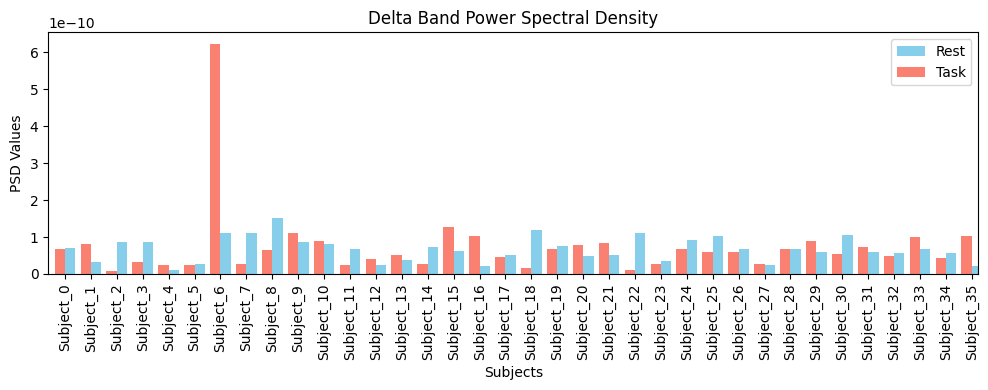

In [42]:
plot_band_psd(df_delta,'Delta') # Delta Plot

### Summary of delta band 

Variability Among Subjects: Variability in PSD values across subjects suggests distinct differences in brain activity within the Delta band. These variations could be attributed to diverse levels of neural synchrony or individual neurophysiological traits.

Comparison Between Rest and Task States:

Higher PSD During Rest: Generally, if PSD values are elevated during rest compared to task conditions across most subjects, it would corroborate established neuroscience findings linking Delta waves to non-REM sleep and deep relaxation phases.

Task-Induced Decreases: A reduction in Delta activity during tasks may signify a transition from a relaxed to a more alert brain state. This shift indicates heightened engagement and cognitive processing, which typically suppresses slower wave activity.

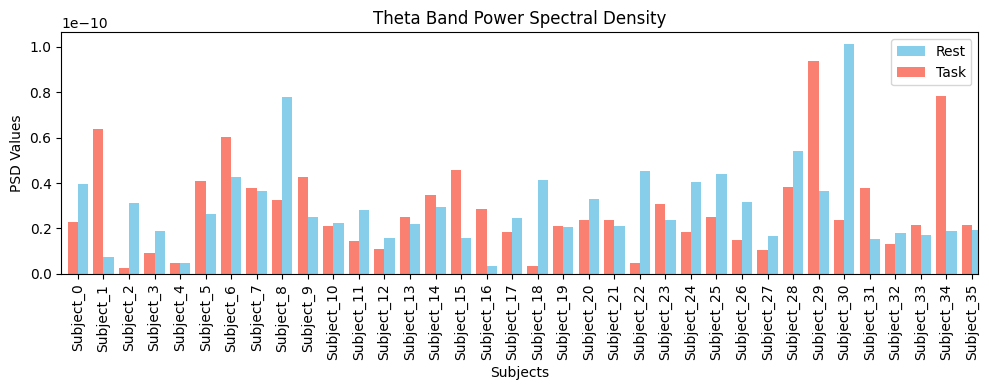

In [43]:
plot_band_psd(df_theta,'Theta') # Theta Plot

### Summary of theta band 

Variability: Significant inter-subject variability is evident in the data, a common occurrence in EEG studies due to individual variations in brain structure and function.

Differences Between States: Some subjects exhibit higher PSD values during the 'Task' condition compared to 'Rest', suggesting heightened cognitive effort or engagement during tasks. In contrast, others display higher values during 'Rest', possibly indicating a more relaxed or meditative state during those periods.

Insights: Elevated PSD values in the Theta band during tasks may be associated with task-specific demands that activate Theta rhythms linked to memory or spatial navigation processes.


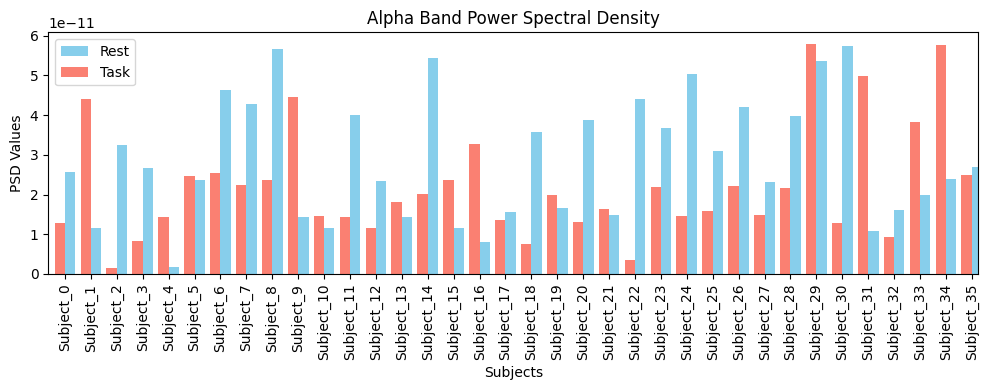

In [44]:
plot_band_psd(df_alpha,'Alpha') # Alpha Plot

### Summary of Alpha band 

Inter-subject Variability: There is noticeable variability in Alpha band power between subjects. This reflects individual differences in baseline brain activities, possibly influenced by physiological, psychological, or methodological factors.

Comparison Between Conditions:

Some subjects exhibit higher Alpha power during the 'Rest' state compared to the 'Task' state. This is expected as Alpha rhythms are typically associated with relaxed, wakeful states with reduced cognitive activity.
Conversely, other subjects show an increase in Alpha power during 'Task'. This could be indicative of tasks that might involve visual imagination, memory recall, or other processes that might increase Alpha activity.
Potential Cognitive Implications:

An increase in Alpha power during tasks might suggest that the task is either under-stimulating, allowing the mind to wander or relax, or that it involves elements (like visualization) that actively engage Alpha rhythms.
A decrease in Alpha power during tasks relative to rest could indicate increased attention and mental focus, suppressing the default Alpha activity.

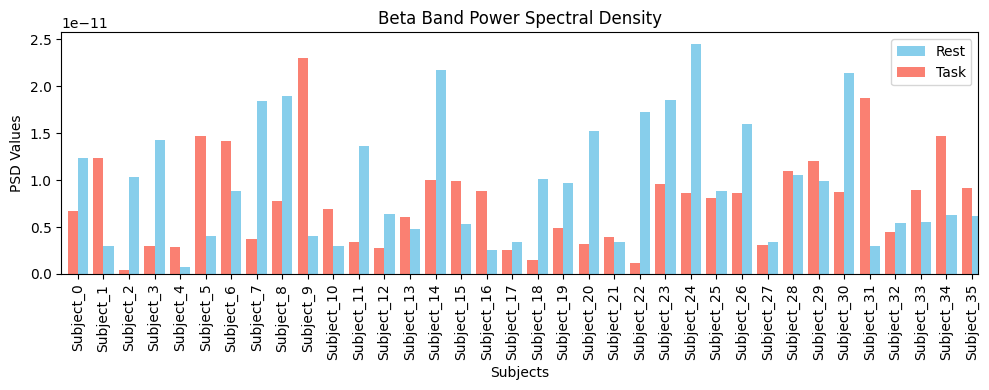

In [45]:
plot_band_psd(df_beta,'Beta') # Beta Plot

### Summary of Beta band 

Variability Across Individuals:

Similar to other frequency bands, there exists notable variability in Beta band power among subjects. This variability is anticipated due to differences in cognitive processing, neural connectivity, and potentially the specific tasks undertaken during the 'Task' state.

Beta Band Characteristics:

During Rest: Generally, Beta activity tends to be lower during states of relaxation and non-focused attention. Some subjects in the dataset conform to this pattern, showing decreased Beta power during periods of 'Rest'.

During Task: In tasks requiring active engagement, alertness, or concentration (such as problem-solving, planning, or decision-making), Beta activity typically increases. The dataset indicates elevated Beta power during 'Task' periods for many subjects, indicative of involvement in mentally demanding activities.

Comparison Between Conditions:

A majority of subjects demonstrate higher Beta power during 'Task' conditions compared to 'Rest'. This aligns with the role of Beta waves in supporting active cognitive processes and sustained attention. However, exceptions exist where certain subjects exhibit minimal changes or even reduced Beta activity during 'Task'. This variability may reflect differences in task demands, individual cognitive strategies, or varying levels of engagement.

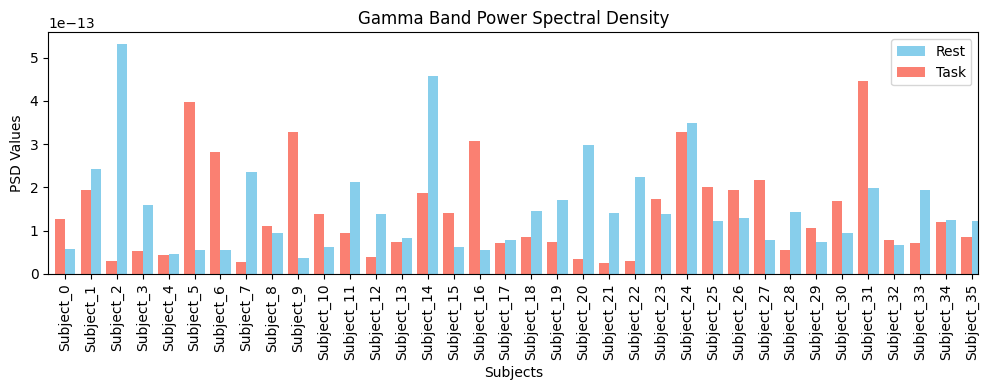

In [46]:
plot_band_psd(df_gamma,'Gamma') # Gamma Plot

### Summary of Gamma band 

Inter-subject Variability:

Similar to the other frequency bands, there is noticeable variability in Gamma band power across subjects.

Gamma Band Dynamics:

Gamma waves are primarily associated with task-related activities, showing consistent elevation during tasks for most subjects, with some exceptions.

The majority of subjects demonstrate higher Gamma power during the 'Task' condition compared to 'Rest'. This aligns with Gamma waves' association with active thinking and concentration.
However, there are instances where certain subjects exhibit minimal change or even decreased Gamma activity during 'Task'. This variability may indicate differences in task nature, individual task strategies, or varying levels of engagement.

In [47]:
calculate_psd_pair(data[0])['Rest']['Delta'] # analysing the 21 values across the channels individually for one of the datapoint , in this case of subject 0 at rest state and it's delta frequency band
# Also a method how to fetch all 21 values of 21 channels of any subject , at any state and any frequency band.

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


array([8.53097781e-12, 1.78628495e-11, 7.15614084e-12, 7.01879087e-12,
       6.02426186e-12, 9.53593122e-12, 3.93264751e-12, 4.32637275e-12,
       7.15027016e-12, 6.77539726e-12, 2.45428585e-12, 2.98712989e-12,
       7.04672740e-12, 8.45570784e-12, 7.70624109e-12, 8.17471992e-12,
       8.33655971e-12, 8.77884578e-12, 8.12782609e-12, 9.01251241e-13,
       1.33130989e-09])

In [48]:
len(calculate_psd_pair(data[0])['Rest']['Delta']) # The length is correct 21 channels 

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


21

In [49]:
def plot_psd_comparison_single_subject(psd_results):
    
    """
    Plots a comparison of mean Power Spectral Density (PSD) values across different EEG frequency bands 
    between 'Rest' and 'Task' states for a single subject.

    This function generates a bar chart where each bar represents the mean PSD value for a specific 
    frequency band during 'Rest' and 'Task' conditions. The plot is particularly useful for visualizing 
    differences in brain activity across different conditions and frequency bands.

    Parameters:
    - psd_results (dict): A dictionary containing the PSD data structured with top-level keys 'Rest' 
      and 'Task', each mapping to a dictionary of frequency bands ('Delta', 'Theta', 'Alpha', 'Beta', 
      'Gamma') with their corresponding mean PSD values.    
      
      """

    bands = psd_results['Rest'].keys()  # Assuming band keys are the same for Rest and Task
    colors = ['skyblue', 'salmon']  # Colors for Rest and Task bars
    band_labels = list(bands)
    n_bands = len(band_labels)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Width of a bar
    bar_width = 0.35
    # Setting the positions of the bars
    index = np.arange(n_bands)
    
    # Creating bars for each band
    rest_means = [psd_results['Rest'][band].mean() for band in bands]
    task_means = [psd_results['Task'][band].mean() for band in bands]
    bars1 = ax.bar(index - bar_width/2, rest_means, bar_width, label='Rest', color=colors[0])
    bars2 = ax.bar(index + bar_width/2, task_means, bar_width, label='Task', color=colors[1])

    ax.set_xlabel('Frequency Band')
    ax.set_ylabel('Mean PSD (Power/Hz)')
    ax.set_title('Comparison of Mean Power Spectral Density (PSD) Across Frequency Bands')
    ax.set_xticks(index)
    ax.set_xticklabels(band_labels)
    ax.legend()

    # Log scale for the y-axis
    ax.set_yscale('log')
    # Set a minimum limit to avoid log(0) issue, ensuring all data is visible
    min_val = min(min(rest_means), min(task_means))
    if min_val > 0:
        ax.set_ylim(min_val / 10, max(max(rest_means), max(task_means)) * 10)
    else:
        ax.set_ylim(1e-12, max(max(rest_means), max(task_means)) * 10)

    # Adding value labels on top of each bar
    for bars in (bars1, bars2):
        for bar in bars:
            yval = bar.get_height()
            # Adjust text position for visibility on log scale
            ax.text(bar.get_x() + bar.get_width()/2, yval * 1.1, f'{yval:.2e}', ha='center', va='bottom', fontsize=9, color='black')

    plt.show()


In [74]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example functions for simplified EEGNet and TSCeption models
def build_eegnet_model(input_shape):
    inputs = Input(shape=input_shape)
    conv1 = Conv2D(16, (1, 10), padding='same', activation='relu')(inputs)
    pool1 = MaxPooling2D(pool_size=(1, 4))(conv1)
    dropout1 = Dropout(0.25)(pool1)
    conv2 = Conv2D(32, (1, 10), padding='same', activation='relu')(dropout1)
    pool2 = MaxPooling2D(pool_size=(1, 4))(conv2)
    dropout2 = Dropout(0.25)(pool2)
    flatten = Flatten()(dropout2)
    dense1 = Dense(64, activation='relu')(flatten)
    dropout3 = Dropout(0.5)(dense1)
    outputs = Dense(1, activation='sigmoid')(dropout3)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_tsception_model(input_shape):
    inputs = Input(shape=input_shape)
    conv1 = Conv2D(8, (1, 5), padding='same', activation='relu')(inputs)
    conv2 = Conv2D(16, (1, 5), padding='same', activation='relu')(conv1)
    pool1 = AveragePooling2D(pool_size=(1, 2))(conv2)
    flatten = Flatten()(pool1)
    dense1 = Dense(64, activation='relu')(flatten)
    dropout1 = Dropout(0.5)(dense1)
    outputs = Dense(1, activation='sigmoid')(dropout1)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Example input shape based on your data dimensions (adjust according to your data)
input_shape = (21, 1000, 1)  # Assuming EEG data is 2D, with channels and time steps

# Generate example data
X_train = np.random.randn(100, input_shape[0], input_shape[1], input_shape[2])  # Example random data
X_test = np.random.randn(20, input_shape[0], input_shape[1], input_shape[2])  # Example random data
y_train = np.random.randint(0, 2, size=(100,))  # Example random labels (binary classification)
y_test = np.random.randint(0, 2, size=(20,))  # Example random labels (binary classification)

# Initialize simplified models
eegnet_model = build_eegnet_model(input_shape)
tsception_model = build_tsception_model(input_shape)

# Train simplified EEGNet model
eegnet_history = eegnet_model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Train simplified TSCeption model
tsception_history = tsception_model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate simplified models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    
    return accuracy, precision, recall, f1

eegnet_metrics = evaluate_model(eegnet_model, X_test, y_test)
tsception_metrics = evaluate_model(tsception_model, X_test, y_test)

print("EEGNet Model Metrics:")
print(f"Accuracy: {eegnet_metrics[0]}")
print(f"Precision: {eegnet_metrics[1]}")
print(f"Recall: {eegnet_metrics[2]}")
print(f"F1-score: {eegnet_metrics[3]}")

print("\nTSCeption Model Metrics:")
print(f"Accuracy: {tsception_metrics[0]}")
print(f"Precision: {tsception_metrics[1]}")
print(f"Recall: {tsception_metrics[2]}")
print(f"F1-score: {tsception_metrics[3]}")


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.3769 - loss: 4.6695 - val_accuracy: 0.4000 - val_loss: 0.8450
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5634 - loss: 0.8761 - val_accuracy: 0.7000 - val_loss: 0.6846
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6161 - loss: 0.6616 - val_accuracy: 0.6000 - val_loss: 0.6852
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6133 - loss: 0.6599 - val_accuracy: 0.6000 - val_loss: 0.6824
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6280 - loss: 0.6742 - val_accuracy: 0.6000 - val_loss: 0.6831
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6322 - loss: 0.6661 - val_accuracy: 0.6000 - val_loss: 0.6830
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5785 - loss: 0.6620 - val_accuracy: 0.6000 - val_loss: 0.6795
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6847 - loss: 0.6514 - val_accuracy: 0.5500 - val_loss: 0.6883
E